<a href="https://colab.research.google.com/github/imdebarun/tensorflow2/blob/main/Neural_Network_Regression_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Network in Tensorflow :
There are many definitions for a regression problem but in our case, we are going to simplify it: predicting a numerical variable based on some other comination of variables, even shorter...predicting a number.

### Hyperparameter & Typical value :
* Input layer shape - Same shape as number of input features
* Hidden layer(s) - Problem specific, minimum = 1, maximum = unlimited
* Neurons per hidden layer - Problem specific generally 10 to 100
* Output layer shape - Same shape as desired prediction shape
* Hidden Activation - Usually ReLU (rectified linear unit)
* Output Activation - None, ReLU, logistic/tanh
* Loss function - MSE (mean squared error) or MAE (mean absolute error) / Huber (combination of MAE/MSE) if outliers
* Optimizer - SGD (Stochastic gradient descent), ADAM

In [1]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.15.0


### Creating some data to view and fit -

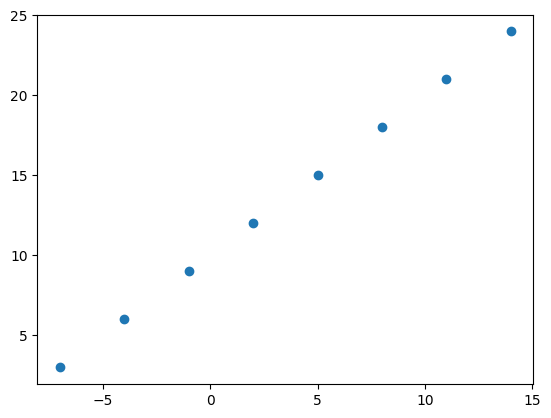

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features -
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels -
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it -
plt.scatter(X,y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and Output shapes -

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([937900])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([937900], dtype=int32)>)

In [5]:
# Turn our numpy arrays into tensors with dtype as float 32.
X = tf.cast(tf.constant(X), dtype= tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [6]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

### Steps in modelling with Tensorflow -
- **Creating a model** - define the input and output layers, as well as the layers of a deeplearning model.
- **Compililng a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model)
- **Fitting the model** - letting the model try to find patterns between X and y (features and labels)

In [7]:
# Add one extra dimension to the input value to become compataible with the model.
X = tf.reshape(X, (-1, 1))

In [8]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 3. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"]) # mae is short form of mean absolute error

# 4. Fit the model
model.fit(X, y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 1s 603ms/step - loss: 13.1970 - mae: 13.1970
Epoch 2/5
1/1 [==============================] - 0s 17ms/step - loss: 13.0645 - mae: 13.0645
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 12.9320 - mae: 12.9320
Epoch 4/5
1/1 [==============================] - 0s 18ms/step - loss: 12.7995 - mae: 12.7995
Epoch 5/5
1/1 [==============================] - 0s 15ms/step - loss: 12.6670 - mae: 12.6670


In [9]:
# # Optional methodology -
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1))

In [10]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
# Try to make a prediction using our model:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 135ms/step


array([[4.496792]], dtype=float32)

In [12]:
y_pred + 11

array([[15.496792]], dtype=float32)

### Steps in modelling with Tensorflow -
1. Construct or import a pretrained model relevant to your problem.
2. Compile the model (prepare it to be used with data)
  * **Loss** - how wrong your model's predictions are compared to the truth labels (we need to minimise this).
  * **Optimizer** - how your model should update its internal patterns to better its predictions.
  * **Metrics** - human interpretable values for how well your model is doing.
3. Fit the model to the training data so it can discover patterns
  * **Epochs** - how many times the model will go through all of the training examples.
4. Evaluate the model on the test data (how reliable are our model's predictions?)


## Improving our Model -
we can improve our model by altering our steps we took to create a model.
1. **Creating a Model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3.**Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer ) or on more data (give the model more examples to learn from).

In [13]:
# Let's rebuild our model

#1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 439ms/step - loss: 11.9673 - mae: 11.9673
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 11.8348 - mae: 11.8348
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 11.7023 - mae: 11.7023
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 11.5698 - mae: 11.5698
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 11.4373 - mae: 11.4373
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 11.3048 - mae: 11.3048
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 11.1723 - mae: 11.1723
Epoch 8/100
1/1 [==============================] - 0s 18ms/step - loss: 11.0398 - mae: 11.0398
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 10.9073 - mae: 10.9073
Epoch 10/100
1/1 [==============================] - 0s 31ms/step - loss: 10.7748 - mae: 10.7748
Epoch 11/100
1/1 [==============================

In [14]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
# Let's see if our model's prediction has improved ...
model.predict([17.0])

1/1 [==============================] - 0s 120ms/step


array([[29.704676]], dtype=float32)

In [16]:
# Let's see if we can make another change to improve our model -

#1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile( loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

#3. Fit the model
model.fit(X,y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 767ms/step - loss: 12.8375 - mae: 12.8375
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 12.3154 - mae: 12.3154
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 11.7873 - mae: 11.7873
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 11.2439 - mae: 11.2439
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 10.6827 - mae: 10.6827
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 10.0985 - mae: 10.0985
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 9.4866 - mae: 9.4866
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 8.8407 - mae: 8.8407
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 8.1548 - mae: 8.1548
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 7.4228 - mae: 7.4228
Epoch 11/100
1/1 [==============================] - 0s 1

In [17]:
# Let's remind ourselves of the data -
X,y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [18]:
# Let's try to predict the y value -
model.predict([17.0])

1/1 [==============================] - 0s 350ms/step


array([[32.116894]], dtype=float32)

In [19]:
# Let's see if we can make another change to improve our model - now No activation function and reduced hidden units.

#1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile( loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

#3. Fit the model
model.fit(X,y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 14.2121 - mae: 14.2121
Epoch 2/100
1/1 [==============================] - 0s 20ms/step - loss: 13.6922 - mae: 13.6922
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 13.1748 - mae: 13.1748
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 12.6571 - mae: 12.6571
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 12.1365 - mae: 12.1365
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 11.6102 - mae: 11.6102
Epoch 7/100
1/1 [==============================] - 0s 24ms/step - loss: 11.0755 - mae: 11.0755
Epoch 8/100
1/1 [==============================] - 0s 18ms/step - loss: 10.5297 - mae: 10.5297
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 9.9699 - mae: 9.9699
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 9.3933 - mae: 9.3933
Epoch 11/100
1/1 [==============================] - 0s 

In [20]:
# Let's try to predict the y value -
model.predict([17.0])

1/1 [==============================] - 0s 487ms/step


array([[30.699419]], dtype=float32)

In [21]:
# Let's see if we can make another change to improve our model - now we change the optimizer to ADAM optimizer

#1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile( loss="mae",
              optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae"])

#3. Fit the model
model.fit(X,y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 14.2452 - mae: 14.2452
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 14.1690 - mae: 14.1690
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 14.0928 - mae: 14.0928
Epoch 4/100
1/1 [==============================] - 0s 26ms/step - loss: 14.0167 - mae: 14.0167
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 13.9407 - mae: 13.9407
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 13.8648 - mae: 13.8648
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 13.7890 - mae: 13.7890
Epoch 8/100
1/1 [==============================] - 0s 23ms/step - loss: 13.7133 - mae: 13.7133
Epoch 9/100
1/1 [==============================] - 0s 30ms/step - loss: 13.6376 - mae: 13.6376
Epoch 10/100
1/1 [==============================] - 0s 33ms/step - loss: 13.5620 - mae: 13.5620
Epoch 11/100
1/1 [==============================] -

In [22]:
# Let's try to predict the y value -
model.predict([17.0])

1/1 [==============================] - 0s 141ms/step


array([[30.48906]], dtype=float32)

In [23]:
# Let's see if we can make another change to improve our model - now we change the optimizer to ADAM optimizer with learning rate

#1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile( loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
               metrics=["mae"])

#3. Fit the model
model.fit(X,y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 13.3462 - mae: 13.3462
Epoch 2/100
1/1 [==============================] - 0s 28ms/step - loss: 13.2761 - mae: 13.2761
Epoch 3/100
1/1 [==============================] - 0s 24ms/step - loss: 13.2061 - mae: 13.2061
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 13.1360 - mae: 13.1360
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 13.0658 - mae: 13.0658
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 12.9955 - mae: 12.9955
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 12.9252 - mae: 12.9252
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 12.8549 - mae: 12.8549
Epoch 9/100
1/1 [==============================] - 0s 30ms/step - loss: 12.7844 - mae: 12.7844
Epoch 10/100
1/1 [==============================] - 0s 19ms/step - loss: 12.7139 - mae: 12.7139
Epoch 11/100
1/1 [==============================] -

In [24]:
# Let's try to predict the y value -
model.predict([17.0])

1/1 [==============================] - 0s 362ms/step


array([[31.987017]], dtype=float32)

## Evaluating a model

In practice , typical workflow you'll go through when building neural network is:
```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ...
```


#### When it comes to evaluation ... there are 3 words you should memorize:
> "visualize, Visualize, Visualize"

It is always a good idea to visualize -
* The data - what data are we working with? What does it look like?
* The model itself - What does our model look like?
* The traning of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original lables).

In [25]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [26]:
# Make labels for the dataset -
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

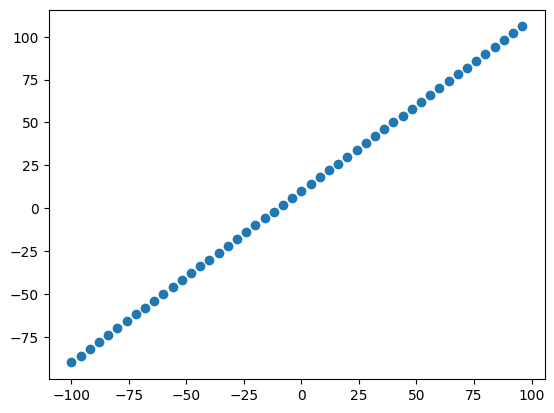

In [27]:
# Visualize the data:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [28]:
# Split the data into train and test sets -
X_train = X[:40]
X_test = X[40:]

y_train = y[:40]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data
Now we have got our data in training and test sets...let's visualize it again

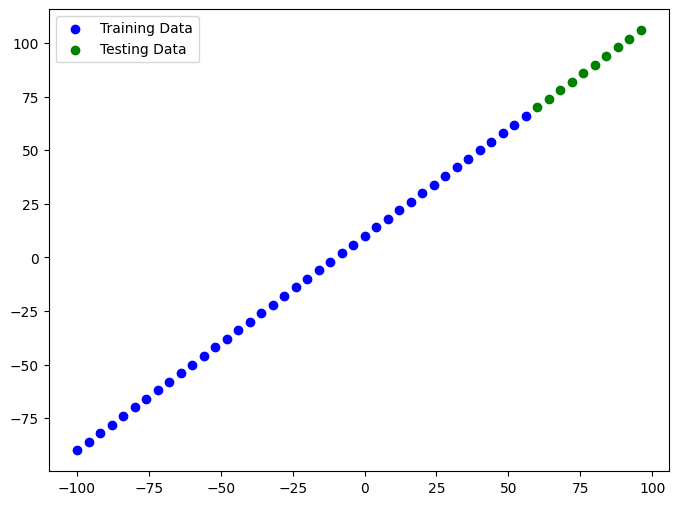

In [29]:
plt.figure(figsize =(8,6))
# Plot training data in blue-
plt.scatter(X_train, y_train, c='b', label = "Training Data") # Our model need to learn on this
# Plot testing data in green
plt.scatter(X_test, y_test, c='g', label = "Testing Data")
# Show a legend
plt.legend();

In [30]:
# Let's have a look at how to build a neural network for our data -

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# # 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

In [31]:
# model.summary()

In [32]:
# Let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)
#1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),
    tf.keras.layers.Dense(1, name='output_layer')  # Dense is a fully connected layer
], name='Model_1')
# 2. Compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])


In [33]:
model.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
# Let's fit our model with the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

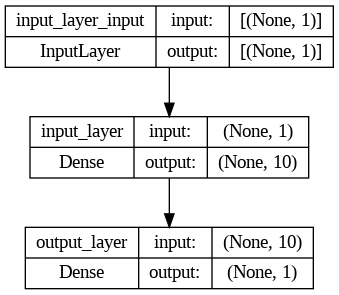

In [35]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes= True)

### Visualizing our Model's predictions -

To visualize the predictions, it's a good practice to plot them against the ground truth labels.
often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions)


In [36]:
# Make some predictions to create y_pred
y_preds = model.predict(X_test)
y_preds

1/1 [==============================] - 0s 93ms/step


array([[ 78.26857 ],
       [ 83.37034 ],
       [ 88.472115],
       [ 93.57389 ],
       [ 98.67566 ],
       [103.77744 ],
       [108.87921 ],
       [113.98099 ],
       [119.082756],
       [124.18453 ]], dtype=float32)

In [37]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [38]:
X_train.shape

TensorShape([40])

In [39]:
y_preds.shape

(10, 1)

In [40]:
# Let's create a plotting function -
def plot_predictions(train_data=X_train,
                     train_labels = y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_preds):
  """ Plots training data, test data and compares predictions to ground truth label """
  plt.figure(figsize=(8,6))
  #plot training data in blue
  plt.scatter(train_data, train_labels, c='b', label='Training Data')
  #plot testing data in green
  plt.scatter(test_data, test_labels, c='g', label ="Testing Data")
  #plot model's predictions in red
  plt.scatter(test_data, predictions, c='r', label = "Predictions")
  # Show the legend
  plt.legend();

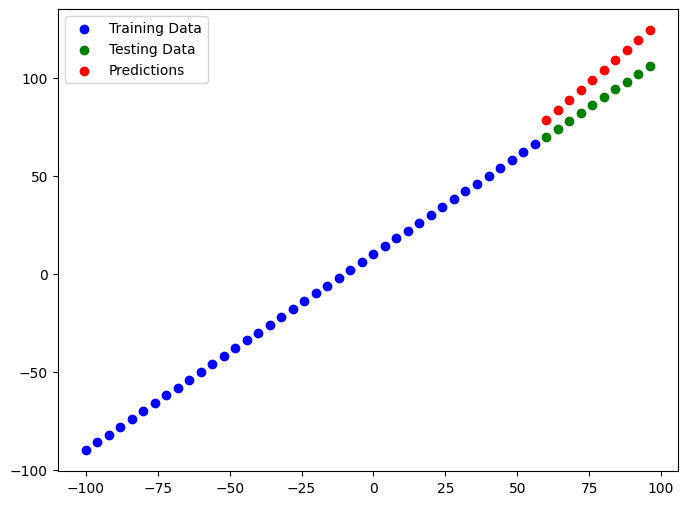

In [41]:
plot_predictions()

### Evaluating our model's prediction with regression evaluation metrics:
Depeneding on the problem you are working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main etrics:
* MAE - mean absolute error, " on average, how wrong is each of my model's predictions".

* MSE - Mean square error, "Square the average errors"

In [42]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 408ms/step - loss: 13.2266 - mae: 13.2266


[13.226550102233887, 13.226550102233887]

In [43]:
# Calaculate the mean absolute error -
mae = tf.metrics.mean_absolute_error(y_true = y_test, y_pred = y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([12.292572, 10.525932, 10.      , 10.714778, 12.805395, 16.221954,
       20.879211, 25.980988, 31.082758, 36.184532], dtype=float32)>

In [44]:
tf.constant(y_preds)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 78.26857 ],
       [ 83.37034 ],
       [ 88.472115],
       [ 93.57389 ],
       [ 98.67566 ],
       [103.77744 ],
       [108.87921 ],
       [113.98099 ],
       [119.082756],
       [124.18453 ]], dtype=float32)>

In [45]:
tf.squeeze(y_preds)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 78.26857 ,  83.37034 ,  88.472115,  93.57389 ,  98.67566 ,
       103.77744 , 108.87921 , 113.98099 , 119.082756, 124.18453 ],
      dtype=float32)>

In [46]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true = y_test,
                                     y_pred = tf.squeeze(y_preds))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=13.22655>

In [47]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_preds))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=184.95638>

In [48]:
# Make some functions to reuse MAE and MSE:
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true = y_true,
                                        y_pred = tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true = y_true,
                                       y_pred = tf.squeeze(y_pred))

### Running experiments to improve our model
```
build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it ->evaluate it ...
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between featureds and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find the pattens in the data.

In [49]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

* Let's do 3 modelling expirements :
1. `model_1` - same as the original model, 1 layer, trained for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

**Build `model_1`**

In [50]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])
# 2. Compile a model
model_1.compile(loss = tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# 3. Fit the Model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 40ms/step - loss: 66.9513 - mae: 66.9513
Epoch 2/100
2/2 [==============================] - 0s 15ms/step - loss: 31.8226 - mae: 31.8226
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 9.8438 - mae: 9.8438
Epoch 4/100
2/2 [==============================] - 0s 24ms/step - loss: 12.0423 - mae: 12.0423
Epoch 5/100
2/2 [==============================] - 0s 13ms/step - loss: 11.1036 - mae: 11.1036
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 10.2564 - mae: 10.2564
Epoch 7/100
2/2 [==============================] - 0s 13ms/step - loss: 9.2633 - mae: 9.2633
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 9.1841 - mae: 9.1841
Epoch 9/100
2/2 [==============================] - 0s 16ms/step - loss: 11.8176 - mae: 11.8176
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 13.7486 - mae: 13.7486
Epoch 11/100
2/2 [==============================] - 0s 

1/1 [==============================] - 0s 279ms/step


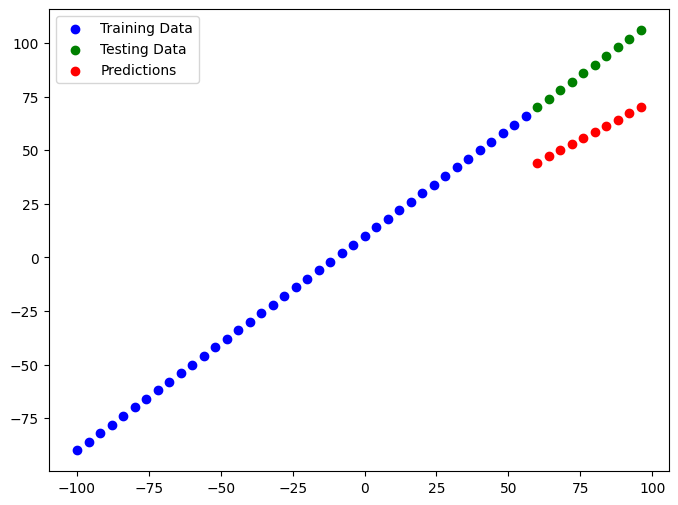

In [51]:
from ast import PyCF_ALLOW_TOP_LEVEL_AWAIT
# MAKE A PLOT PREDICTIONS FOR MODEL_1:
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [52]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test,y_preds_1)
mse_1 = mse(y_test,y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.85764>,
 <tf.Tensor: shape=(), dtype=float32, numpy=962.8231>)

**Build -> `model_2`**
* 2 Dense layers, trained for 100 epochs

In [55]:
# Set the random seed
tf.random.set_seed(42)

#1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss = tf.keras.losses.mae,
                 optimizer = tf.keras.optimizers.SGD(),
                 metrics = ["mse"])

#3. Fit the model
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 13ms/step - loss: 46.1439 - mse: 3156.8423
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 16.9317 - mse: 447.1936
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 16.8242 - mse: 404.5046
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 14.1135 - mse: 254.9138
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 15.5710 - mse: 316.1104
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 12.3327 - mse: 193.5316
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 11.5857 - mse: 164.0544
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 11.2029 - mse: 181.4837
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 42.0458 - mse: 2826.2732
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 29.2382 - mse: 1209.5237
Epoch 11/100
2/2 [===========================

1/1 [==============================] - 0s 86ms/step


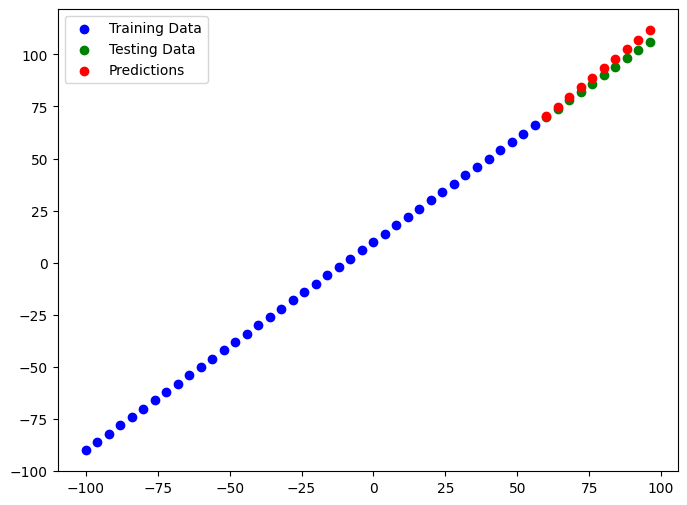

In [56]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions = y_preds_2)

In [57]:
# Calculate model_2 evaluation metrics -
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=2.9480965>,
 <tf.Tensor: shape=(), dtype=float32, numpy=11.430389>)

**Build `model_3`**
* 2 layers, trained for 500 epochs

In [59]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mse'])

# 3. Fit the model
model_3.fit(X_train, y_train, epochs = 500)

Epoch 1/500
2/2 [==============================] - 0s 11ms/step - loss: 65.1243 - mse: 6520.0752
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 27.1446 - mse: 1147.7701
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 20.0655 - mse: 590.7103
Epoch 4/500
2/2 [==============================] - 0s 8ms/step - loss: 13.0177 - mse: 231.6626
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 16.4997 - mse: 361.0232
Epoch 6/500
2/2 [==============================] - 0s 7ms/step - loss: 11.2142 - mse: 140.0922
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 12.2361 - mse: 191.4113
Epoch 8/500
2/2 [==============================] - 0s 6ms/step - loss: 10.9387 - mse: 137.6586
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 38.2485 - mse: 2265.0212
Epoch 10/500
2/2 [==============================] - 0s 8ms/step - loss: 25.7965 - mse: 935.0475
Epoch 11/500
2/2 [===========================

1/1 [==============================] - 0s 85ms/step


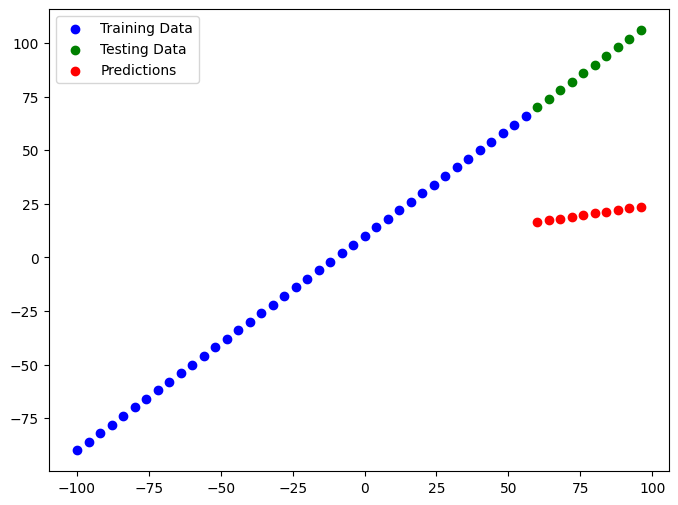

In [60]:
# Make and Plot some predictions -
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [61]:
# Lets calculate model_3 evaluation metrics-
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.90511>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4695.4277>)

## Comparing the results of our experiments :
* We have run a few experiments, let's compare the results-


In [64]:
# Let's Compare our model's results using pandas Dataframe -
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]
all_results = pd.DataFrame(model_results, columns=['Model', 'mae', 'mse'])
all_results

,Model,mae,mse
0,model_1,30.857639,962.823120
1,model_2,2.948097,11.430389
2,model_3,67.905113,4695.427734


In [65]:
model_2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                20        
                                                                 
 dense_17 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
